<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Load and Prepare Data

In [4]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\Compressed\1626614683051222\Project 2 - Churn modelling\\Churn.csv")

# take a look at the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9514,9515,15565879,Riley,845,France,Female,28,9,0.00,2,1,1,56185.98,0
7504,7505,15587038,Ogochukwu,654,Spain,Female,32,2,0.00,1,1,1,51972.92,1
5871,5872,15709920,Burke,479,France,Female,33,2,208165.53,1,0,0,50774.81,1
963,964,15731815,Nepean,529,Spain,Male,63,4,96134.11,3,1,0,108732.96,1
2679,2680,15725698,Panicucci,520,Spain,Female,35,4,115680.81,1,1,1,90280.70,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [11]:
pd.crosstab(df.Gender,df.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [12]:
pd.crosstab(df.Gender,df.IsActiveMember)

IsActiveMember,0,1
Gender,,
Female,2259,2284
Male,2590,2867


In [13]:
pd.crosstab(df.Age < 43,df.Exited)

Exited,0,1
Age,,
False,1689,1205
True,6274,832


In [14]:
pd.crosstab(df.Age > 43,df.Exited)

Exited,0,1
Age,,
False,6483,920
True,1480,1117


In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

In [16]:
#Fetch features of type Object
objFeatures = df.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    df[feat] = le.fit_transform(df[feat].astype(str))
 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


## Strorytelling - Visualization

In [17]:
print(df.corr()['Exited'])

RowNumber         -0.016571
CustomerId        -0.006248
Surname           -0.010822
CreditScore       -0.027094
Geography          0.035943
Gender            -0.106512
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64


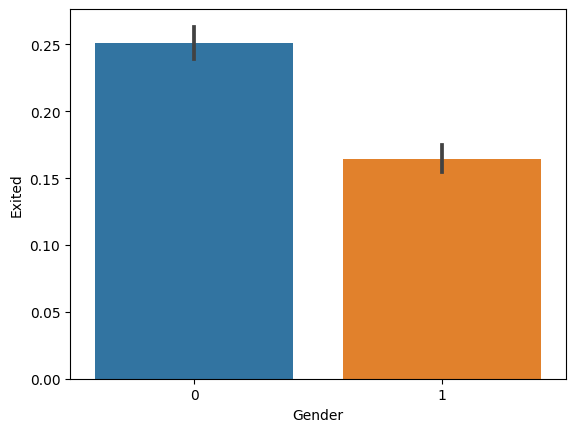

In [18]:
sns.barplot(x="Gender", y="Exited", data = df)
plt.show()

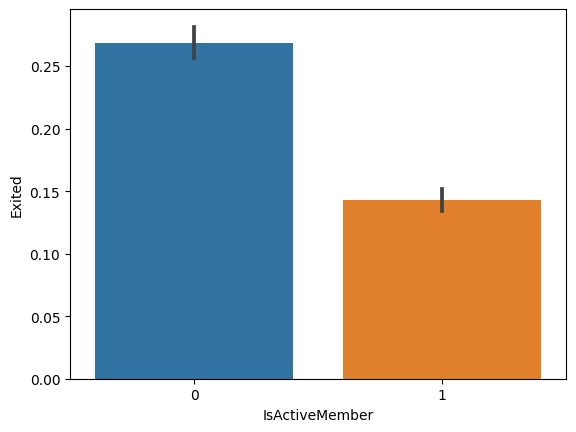

In [19]:
sns.barplot(x="IsActiveMember", y="Exited", data = df)
plt.show()

## Prepare Data for Machine learning

In [20]:
x = df[['Gender', 'Age', 'Balance', 'IsActiveMember', 'NumOfProducts']].astype('int')
#x
y=df['Exited']

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x


array([[-1.09598752,  0.29351742, -1.2258469 ,  0.97024255, -0.91158349],
       [-1.09598752,  0.19816383,  0.11734175,  0.97024255, -0.91158349],
       [-1.09598752,  0.29351742,  1.33305032, -1.03067011,  2.52705662],
       ...,
       [-1.09598752, -0.27860412, -1.2258469 ,  0.97024255, -0.91158349],
       [ 0.91241915,  0.29351742, -0.02260746, -1.03067011,  0.80773656],
       [-1.09598752, -1.04143285,  0.85996045, -1.03067011, -0.91158349]])

## Train your model

In [22]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 5)
(8000,)
(2000, 5)
(2000,)


In [24]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = logreg.predict(x_test)

In [26]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.804


In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_pred ,pos_label=0)

0.7973112719751809

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test,y_pred, labels=[1,0]))

[[  66  339]
 [  53 1542]]


Confusion matrix, without normalization
[[  66  339]
 [  53 1542]]


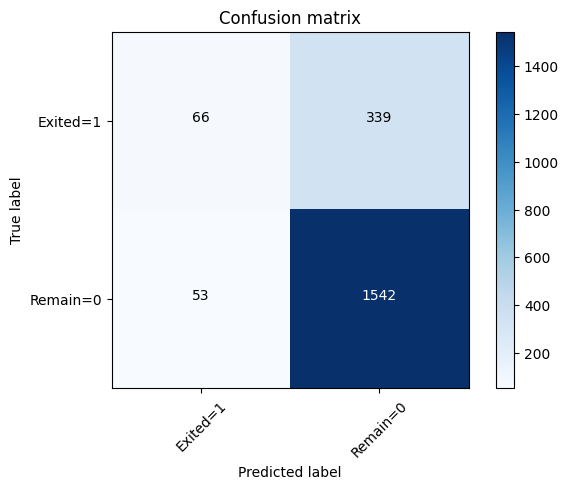

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Exited=1','Remain=0'],normalize= False,  title='Confusion matrix')

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [31]:
 y_pred = clf.predict(x_test)
 y_pred
    

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.8309339134148295

In [33]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_pred ,pos_label=0)

0.841081081081081

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1595
           1       0.79      0.37      0.51       405

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000

Confusion matrix, without normalization
[[ 150  255]
 [  39 1556]]


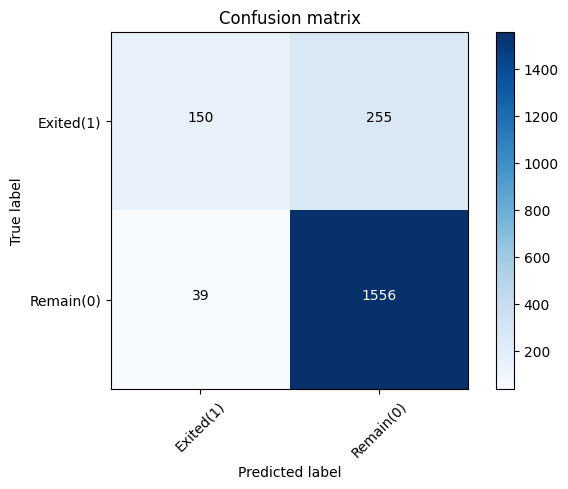

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred , labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred ))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Exited(1)','Remain(0)'],normalize= False,  title='Confusion matrix')

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
print (y_pred[0:5])
print (y_test[0:5])

[0 0 0 0 0]
7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64


In [39]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test,y_pred ))

DecisionTrees's Accuracy:  0.799


In [40]:
# Building  Random Forest Classifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(x_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(x_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 0.9356060606060604


In [41]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(x_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.5317139001349529


In [42]:
rfc.feature_importances_

array([0.02, 0.33, 0.46, 0.04, 0.15])

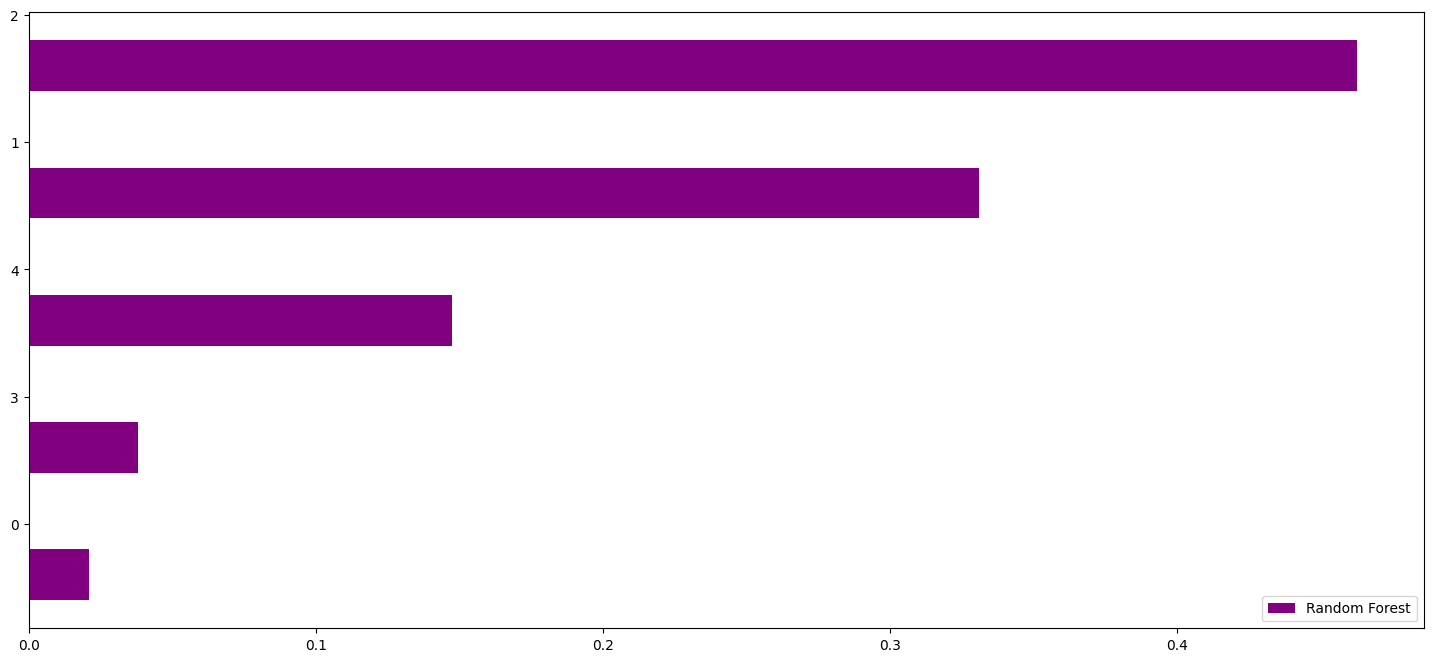

In [43]:
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_})
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

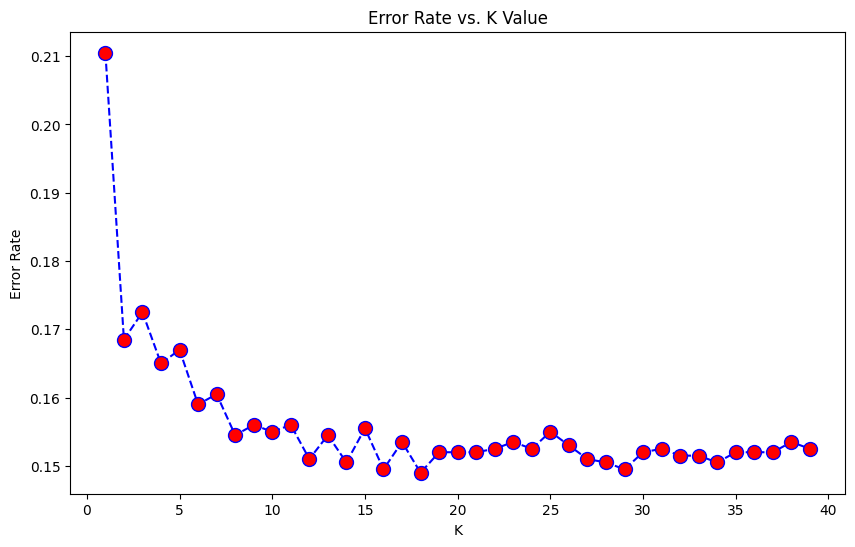

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=17)

In [48]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [49]:
y_pred = knn.predict(x_test)

In [50]:
knn.score(x_train, y_train)

0.8655

In [51]:
knn.score(x_test, y_test)

0.8465

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.71      0.41      0.52       405

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



<Axes: >

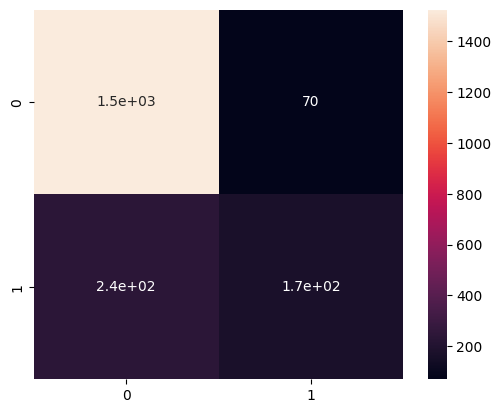

In [53]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

## Test the model and show the metrics

## Save your final model

## Send us the Result (Maktabkhoone)